## Degree Distribution

In [1]:
from src.Distributions import *
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FormatStrFormatter, ScalarFormatter, LogLocator, LogFormatterSciNotation
import matplotlib.lines as mlines
from itertools import cycle
from IPython.display import clear_output
plt.style.use('properties.mplstyle')

In [2]:
N = 10**5
dim = [1, 2, 3, 4]
alpha_g_v = np.arange(1.0, 10, 0.5)
alpha_a_v = np.arange(2.0, 10, 0.5)
# read json of degree and converter to DataFrame Pandas
df_degree = json_to_dataframe_with_lists('../../data/degree_distributions.json')
# read json of degree and converter to DataFrame Pandas
df_distances = json_to_dataframe_with_lists('../../data/distances_distributions.json')
df_degree.head()

,N,alpha_A,alpha_G,dim,N_s,k,Pk
0,100000,2.0,1.0,1,288,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.3220877720689208, 0.0858181537978881, 0.039..."
1,100000,2.0,2.0,1,1309,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.1811911965519762, 0.0573247778289386, 0.038..."
2,100000,2.0,3.0,1,539,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.1779715478227928, 0.0907682629019056, 0.081..."
3,100000,2.0,4.0,1,539,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.2267843095187013, 0.1603196738897232, 0.145..."
4,100000,2.0,5.0,1,539,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.3104059246282176, 0.248989667735064, 0.1669..."


In [ ]:
df_distances.head()

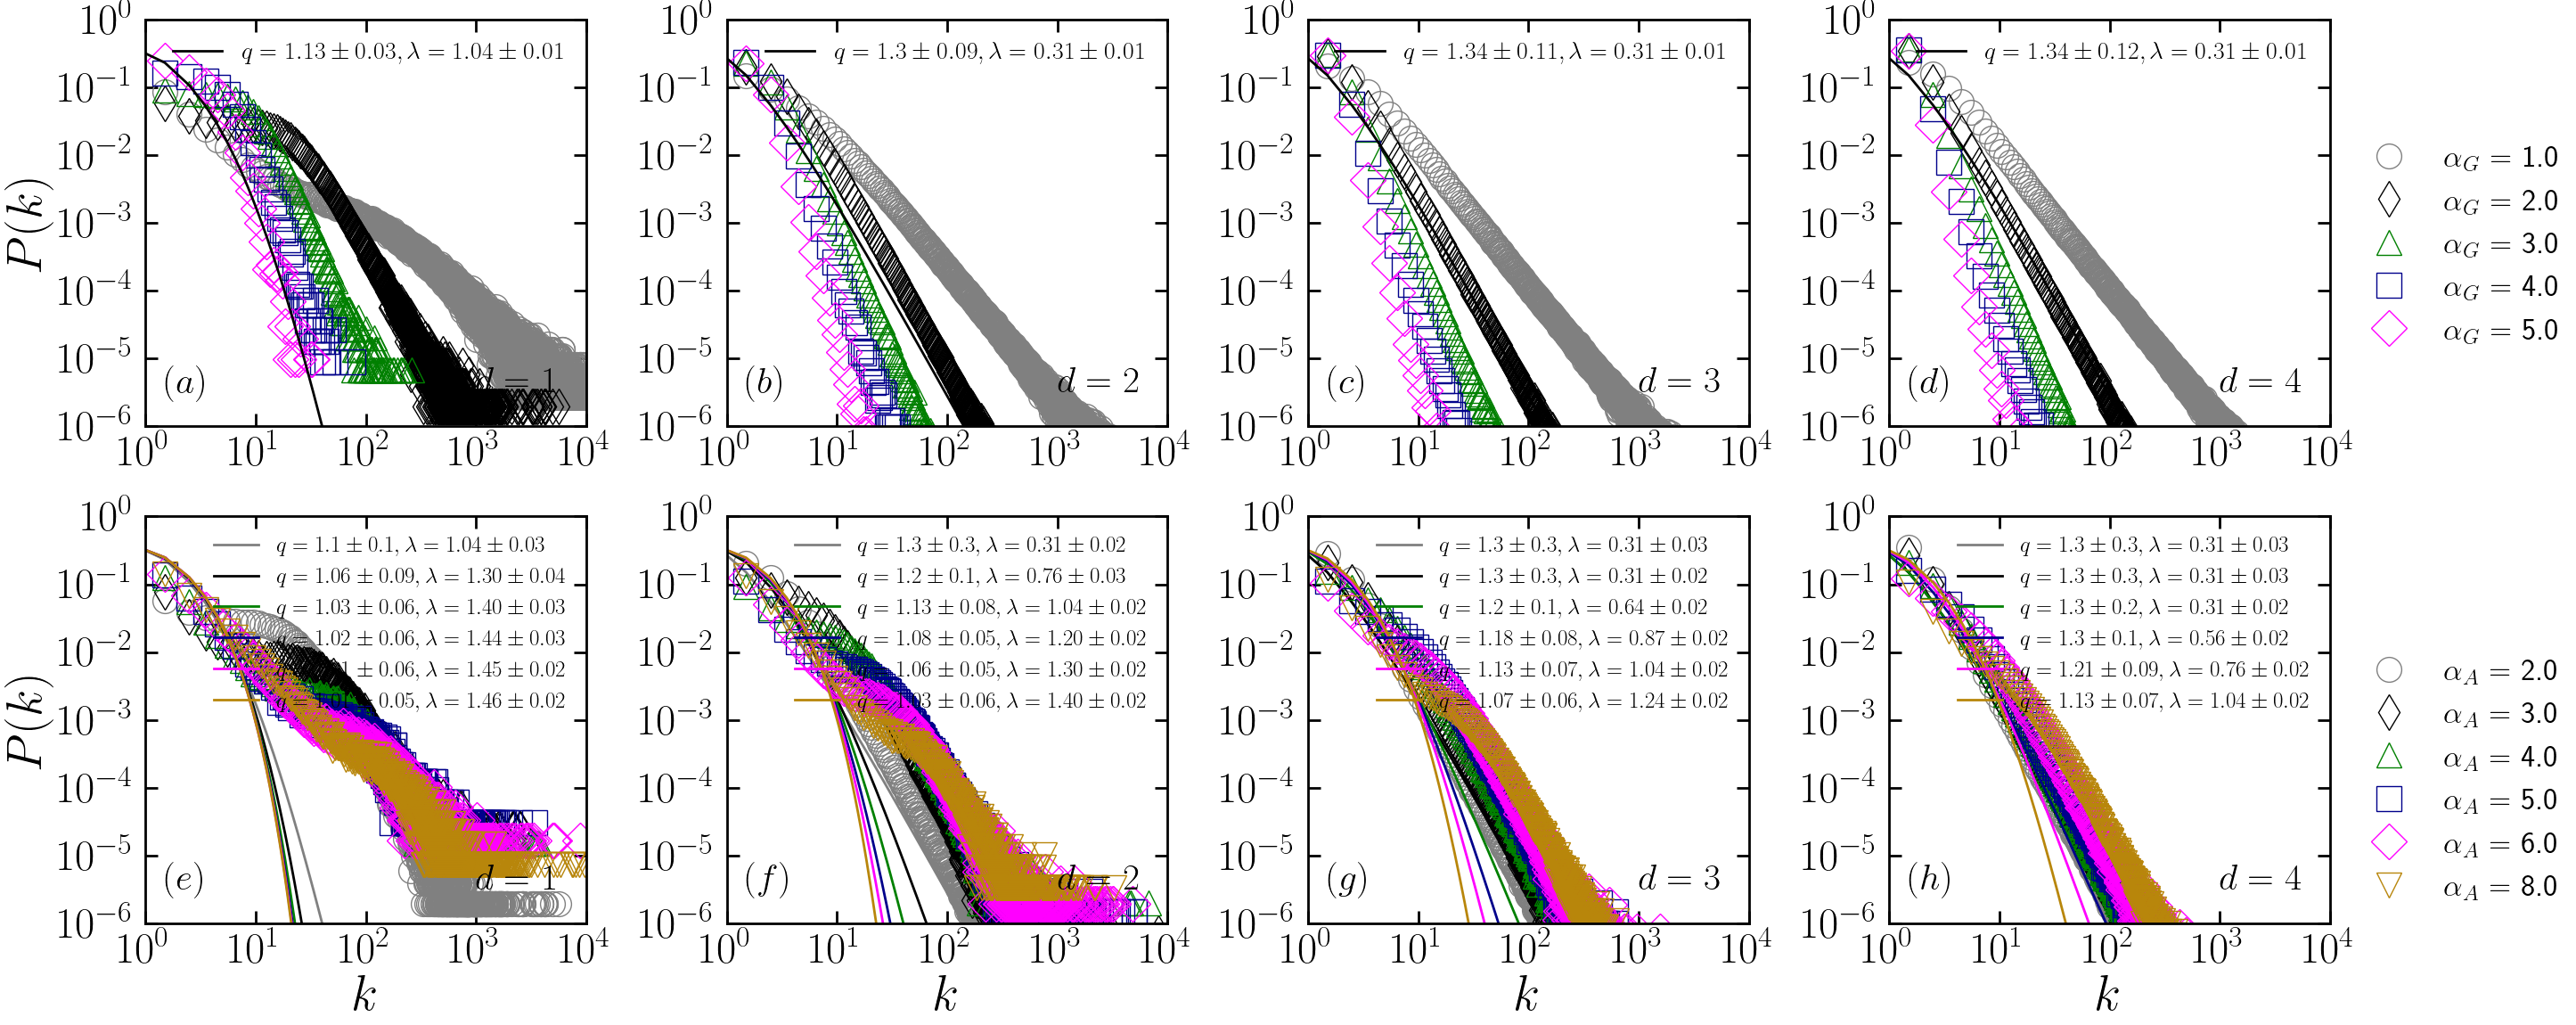

In [3]:
alpha_ag_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0]
alpha_a_v = [2.0, 3.0, 4.0, 5.0, 6.0, 8.0]
dim_list = [1,2,3,4]

# Alpha_A fixo em 2.0, Alpha_G variando
k_1d_g, pk_1d_g = get_k_pk_from_dataframe(df_degree, dim=1, fixed_param='alpha_A', fixed_value=2.0, varying_param_list=alpha_g_v)
k_2d_g, pk_2d_g = get_k_pk_from_dataframe(df_degree, dim=2, fixed_param='alpha_A', fixed_value=2.0, varying_param_list=alpha_g_v)
k_3d_g, pk_3d_g = get_k_pk_from_dataframe(df_degree, dim=3, fixed_param='alpha_A', fixed_value=2.0, varying_param_list=alpha_g_v)
k_4d_g, pk_4d_g = get_k_pk_from_dataframe(df_degree, dim=4, fixed_param='alpha_A', fixed_value=2.0, varying_param_list=alpha_g_v)

q_1d, err_1d_q, b_1d, err_1d_b = combine_estimates_from_datasets(k_1d_g, pk_1d_g, dim = 1)
q_2d, err_2d_q ,b_2d, err_2d_b = combine_estimates_from_datasets(k_2d_g, pk_2d_g, dim = 2)
q_3d, err_3d_q, b_3d, err_3d_b = combine_estimates_from_datasets(k_3d_g, pk_3d_g, dim = 3)
q_4d, err_4d_q, b_4d, err_4d_b = combine_estimates_from_datasets(k_4d_g, pk_4d_g, dim = 4)

Q, Q_err, B, B_err = [q_1d, q_2d, q_3d, q_4d], [err_1d_q, err_2d_q, err_3d_q, err_4d_q], [b_1d, b_2d, b_3d, b_4d], [err_1d_b, err_2d_b, err_3d_b, err_4d_b]


# ✔️ Ler os JSONs convertidos em DataFrames
df_degree = json_to_dataframe_with_lists('../../data/degree_distributions.json')
df_distances = json_to_dataframe_with_lists('../../data/distances_distributions.json')

label_1d = f'$q =  {q_1d:.2f} \\pm {err_1d_q:.2f}, \\lambda = {b_1d:.2f} \\pm {err_1d_b:.2f}$'
label_2d = f'$q = {q_2d:.1f} \\pm {err_2d_q:.2f}, \\lambda = {b_2d:.2f} \\pm {err_2d_b:.2f}$'
label_3d = f'$q = {q_3d:.2f} \\pm {err_3d_q:.2f}, \\lambda = {b_3d:.2f} \\pm {err_3d_b:.2f}$'
label_4d = f'$q = {q_4d:.2f} \\pm {err_4d_q:.2f}, \\lambda = {b_4d:.2f} \\pm {err_4d_b:.2f}$'
labels = [label_1d, label_2d, label_3d, label_4d]

# ✔️ Configurações visuais
color = ["#808080", "black", '#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D", "v"]
markersize = 20
thickness_axes = 2.0
font_size_labels = 40
ticks_label_size = 35
dim_list = [1, 2, 3, 4]

labels_tick = ["$(a)$", "$(b)$", "$(c)$", "$(d)$", "$(e)$", "$(f)$", "$(g)$", "$(h)$"]

df_degree_filter_alpha_g = df_degree[
    (df_degree['alpha_A'].isin([2.0])) & 
    (df_degree['alpha_G'].isin(alpha_g_v))
]

# Para plot de baixo
df_degree_filter_alpha_a = df_degree[
    (df_degree['alpha_G'] == alpha_ag_f) & 
    (df_degree['alpha_A'].isin(alpha_a_v))
]

labels_global_alpha_g = [rf"$\alpha_G$ = {a:.1f}" for a in alpha_g_v]
labels_global_alpha_a = [rf"$\alpha_A$ = {a:.1f}" for a in alpha_a_v]

# ✔️ Criando figura 2x4
fig, ax = plt.subplots(2, 4, figsize=(30, 12))

# =====================================
# ✔️ PLOT DE CIMA (Alpha_A fixo, Alpha_G variando)
# =====================================
for idx, d in enumerate(dim_list):
    row, col = 0, idx
    df_dim = df_degree_filter_alpha_g[df_degree_filter_alpha_g['dim'] == d]

    for i, alpha_g in enumerate(alpha_g_v):
        df_alpha = df_dim[df_dim['alpha_G'] == alpha_g]

        if not df_alpha.empty:
            k = df_alpha['k'].iloc[0]
            pk = df_alpha['Pk'].iloc[0]
            ax[row, col].plot(
                k, pk,
                marker=markers[i % len(markers)],
                color=color[i % len(color)],
                markersize=markersize,
                linestyle='None',
                markerfacecolor='none',
                mew=1.0,
                label="_nolegend_"
            )
    
    df_alpha = df_dim[df_dim['alpha_G'] == 1.0]
    ax[row, col].plot(
        df_alpha['k'].iloc[0],
        q_exp(df_alpha['k'].iloc[0], Q[idx], B[idx]),
        linewidth=thickness_axes, color='k',
        label=labels[idx]
    )

    ax[row, col].text(1.5, 10**(-5.5), labels_tick[idx], fontsize=30)
    ax[row, col].text(1e3, 10**(-5.5), f"$d = {d}$", fontsize=30)

    ax[row, col].set_xscale('log')
    ax[row, col].set_yscale('log')
    ax[row, col].set_xlim([1, 1e4])
    ax[row, col].set_ylim([1e-6, 1])
    if(col==0):
        ax[row, col].set_ylabel(r"$P(k)$", size=font_size_labels)
    #ax[row, col].set_xlabel(r"$k$", size=25)

    ax[row, col].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, labelsize=ticks_label_size)
    ax[row, col].tick_params(axis='both', which='minor', direction='in', length=7, width=thickness_axes)

    ax[row, col].xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
    ax[row, col].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
    ax[row, col].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto'))
    ax[row, col].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto'))

    ax[row, col].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
    ax[row, col].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))

    ax[row, col].legend(prop={"size":20}, fancybox=True, framealpha=0.0)

    for spine in ax[row, col].spines.values():
        spine.set_linewidth(thickness_axes)


# =====================================
# ✔️ PLOT DE BAIXO (Alpha_G fixo, Alpha_A variando)
# =====================================
for idx, d in enumerate(dim_list):
    row, col = 1, idx
    df_dim = df_degree_filter_alpha_a[df_degree_filter_alpha_a['dim'] == d]

    for i, alpha_a in enumerate(alpha_a_v):
        df_alpha = df_dim[df_dim['alpha_A'] == alpha_a]

        if not df_alpha.empty:
            k = df_alpha['k'].iloc[0]
            pk = df_alpha['Pk'].iloc[0]

            fitted_q, fitted_b, perr_q, perr_b = optimize_q_exp(
                k, pk,
                q_initial=q(alpha_a, d),
                b_initial=eta(alpha_a, d),
                delta_q=0.01,
                delta_b=0.01
            )

            ax[row, col].plot(
                k, pk,
                marker=markers[i % len(markers)],
                color=color[i % len(color)],
                markersize=markersize,
                linestyle='None',
                markerfacecolor='none',
                mew=1.0,
                label="_nolegend_"
            )

            ax[row, col].plot(
                k, q_exp(k, fitted_q, fitted_b),
                color=color[i % len(color)],
                linewidth=thickness_axes,
                label = f"$q = {round_measurement(fitted_q, perr_q)}, \\lambda = {round_measurement(fitted_b, perr_b)}$"
            )

    ax[row, col].text(1.5, 10**(-5.5), labels_tick[idx + 4], fontsize=30)
    ax[row, col].text(1e3, 10**(-5.5), f"$d = {d}$", fontsize=30)

    ax[row, col].set_xscale('log')
    ax[row, col].set_yscale('log')
    ax[row, col].set_xlim([1, 1e4])
    ax[row, col].set_ylim([1e-6, 1])
    if(col==0):
        ax[row, col].set_ylabel(r"$P(k)$", size=font_size_labels)
    ax[row, col].set_xlabel(r"$k$", size=font_size_labels)

    ax[row, col].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, labelsize=ticks_label_size)
    ax[row, col].tick_params(axis='both', which='minor', direction='in', length=7, width=thickness_axes)

    ax[row, col].xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
    ax[row, col].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
    ax[row, col].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto'))
    ax[row, col].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto'))

    ax[row, col].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
    ax[row, col].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))

    ax[row, col].legend(prop={"size":18}, fancybox=True, framealpha=0.0)

    for spine in ax[row, col].spines.values():
        spine.set_linewidth(thickness_axes)


# Legenda para alpha_G (plot de cima)
proxy_handles_alpha_g = [
    plt.Line2D([], [], color=color[i % len(color)], marker=markers[i % len(markers)], linestyle='None',
               markersize=markersize, markerfacecolor='none', mew=1.0)
    for i in range(len(alpha_g_v))
]
fig.legend(proxy_handles_alpha_g, labels_global_alpha_g, loc="center left", bbox_to_anchor=(0.88, 0.75),
           fontsize=25, frameon=False)

# Legenda para alpha_A (plot de baixo)
proxy_handles_alpha_a = [
    plt.Line2D([], [], color=color[i % len(color)], marker=markers[i % len(markers)], linestyle='None',
               markersize=markersize, markerfacecolor='none', mew=1.0)
    for i in range(len(alpha_a_v))
]
fig.legend(proxy_handles_alpha_a, labels_global_alpha_a, loc="center left", bbox_to_anchor=(0.88, 0.25),
           fontsize=25, frameon=False)


plt.tight_layout(rect=[0, 0, 0.9, 1])
#plt.savefig("../../presentation/distributions/degree_distribution.svg", dpi=300)
plt.show()
